In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import path as p
import os
from sklearn.metrics import mean_squared_error

In [3]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [4]:
X_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["dist"]

In [5]:
X_val = np.load(os.path.join(data_folder,'Xy_val_dist.npz'))["y"]
y_val = np.load(os.path.join(data_folder, 'Xy_val_dist.npz'))["dist"]

In [6]:
X_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["dist"]

In [7]:
X_pred = np.load(os.path.join(data_dir, 'trained_models/UNet_training_generator_1500epochs/Xy_test_predicted_UNet.npz'))['y']
y_pred = np.load(os.path.join(data_dir, 'trained_models/UNet_training_generator_1500epochs/Xy_test_predicted_UNet.npz'))['dist']

In [8]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

In [9]:
def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [10]:
X_train_cut = cut_X(X_train)

In [11]:
X_val_cut = cut_X(X_val)

In [12]:
X_test_cut = cut_X(X_test)

In [13]:
X_pred_cut = cut_X(X_pred)

In [59]:
X_train_RF = reshape_RF(X_train_cut)
X_val_RF = reshape_RF(X_val_cut)
X_test_RF = reshape_RF(X_test_cut)

In [15]:
N_EPOCHS = 30
BATCH_SIZE = 8

CHECKPOINT_FOLDER_PATH = p.join(data_dir, 'trained_models')
TASK_NAME = 'Leaf_position_regression'
TASK_FOLDER_PATH = p.join(CHECKPOINT_FOLDER_PATH, TASK_NAME)

if not p.exists(TASK_FOLDER_PATH):
    os.makedirs(TASK_FOLDER_PATH)

## Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [50]:
def rf_training(depth, estimators,X,y):
    model = RandomForestRegressor(max_depth=depth, n_estimators=estimators, n_jobs=-1,
                                 criterion='mse')
    model.fit(X,y)
    score = model.score(X,y)
    print("score:{}, depth:{}, estimators:{}".format(score,depth,estimators))
    return model, score

In [41]:
estimators = np.arange(2,102,2)
print(estimators)

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


In [39]:
depths = np.arange(1,11)
depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [70]:
from tqdm import tqdm
from sklearn.externals import joblib

In [68]:
depths

'leaf_regression_RF_72est_1depth.pkl'

In [ ]:
scores = []
for d in tqdm(depths[1:]):
    for est in tqdm(estimators):
        model, score = rf_training(d,est, X_train_RF, y_train)
        scores.append((score, d, est))
        filename = os.path.join(TASK_FOLDER_PATH,'leaf_regression_RF_{}est_{}depth.pkl'.format(est, d))
        print(filename.split('/')[-1])
        _ = joblib.dump(model, filename, compress=9)

  2%|▏         | 1/50 [00:05<04:14,  5.19s/it]

score:0.993564267809044, depth:2, estimators:2
leaf_regression_RF_2est_2depth.pkl



  4%|▍         | 2/50 [00:12<04:33,  5.69s/it]

score:0.9928417499426078, depth:2, estimators:4
leaf_regression_RF_4est_2depth.pkl



  6%|▌         | 3/50 [00:19<04:52,  6.23s/it]

score:0.9934855757673752, depth:2, estimators:6
leaf_regression_RF_6est_2depth.pkl



  8%|▊         | 4/50 [00:30<05:50,  7.63s/it]

score:0.9934442293571515, depth:2, estimators:8
leaf_regression_RF_8est_2depth.pkl



 10%|█         | 5/50 [00:42<06:49,  9.10s/it]

score:0.9935826491331712, depth:2, estimators:10
leaf_regression_RF_10est_2depth.pkl



 12%|█▏        | 6/50 [00:56<07:37, 10.40s/it]

score:0.9935678906914366, depth:2, estimators:12
leaf_regression_RF_12est_2depth.pkl



 14%|█▍        | 7/50 [01:12<08:42, 12.14s/it]

score:0.9935415174184626, depth:2, estimators:14
leaf_regression_RF_14est_2depth.pkl



 16%|█▌        | 8/50 [01:30<09:45, 13.94s/it]

score:0.9935694566191753, depth:2, estimators:16
leaf_regression_RF_16est_2depth.pkl



 18%|█▊        | 9/50 [01:49<10:31, 15.40s/it]

score:0.9936077027624916, depth:2, estimators:18
leaf_regression_RF_18est_2depth.pkl



 20%|██        | 10/50 [02:11<11:33, 17.34s/it]

score:0.9936313004529258, depth:2, estimators:20
leaf_regression_RF_20est_2depth.pkl



 22%|██▏       | 11/50 [02:35<12:32, 19.29s/it]

score:0.9936134728930153, depth:2, estimators:22
leaf_regression_RF_22est_2depth.pkl



 24%|██▍       | 12/50 [03:00<13:16, 20.96s/it]

score:0.9936627585723954, depth:2, estimators:24
leaf_regression_RF_24est_2depth.pkl



 26%|██▌       | 13/50 [03:27<14:06, 22.89s/it]

score:0.9936553926591423, depth:2, estimators:26
leaf_regression_RF_26est_2depth.pkl



 28%|██▊       | 14/50 [03:57<14:59, 24.98s/it]

score:0.9936479084415936, depth:2, estimators:28
leaf_regression_RF_28est_2depth.pkl



 30%|███       | 15/50 [04:27<15:32, 26.64s/it]

score:0.993687994713338, depth:2, estimators:30
leaf_regression_RF_30est_2depth.pkl



 32%|███▏      | 16/50 [05:02<16:27, 29.06s/it]

score:0.9936426002986869, depth:2, estimators:32
leaf_regression_RF_32est_2depth.pkl



 34%|███▍      | 17/50 [05:37<16:58, 30.87s/it]

score:0.993669139634532, depth:2, estimators:34
leaf_regression_RF_34est_2depth.pkl



 36%|███▌      | 18/50 [06:15<17:38, 33.08s/it]

score:0.9936763189818013, depth:2, estimators:36
leaf_regression_RF_36est_2depth.pkl



 38%|███▊      | 19/50 [06:59<18:44, 36.27s/it]

score:0.993576577311269, depth:2, estimators:38
leaf_regression_RF_38est_2depth.pkl



 40%|████      | 20/50 [07:44<19:26, 38.88s/it]

score:0.9937011974092779, depth:2, estimators:40
leaf_regression_RF_40est_2depth.pkl



 42%|████▏     | 21/50 [08:32<20:07, 41.64s/it]

score:0.9936913716310402, depth:2, estimators:42
leaf_regression_RF_42est_2depth.pkl



 44%|████▍     | 22/50 [09:19<20:05, 43.05s/it]

score:0.9936540060354597, depth:2, estimators:44
leaf_regression_RF_44est_2depth.pkl



 46%|████▌     | 23/50 [10:05<19:46, 43.94s/it]

score:0.993688919830399, depth:2, estimators:46
leaf_regression_RF_46est_2depth.pkl



 48%|████▊     | 24/50 [10:52<19:33, 45.15s/it]

score:0.9937068978475003, depth:2, estimators:48
leaf_regression_RF_48est_2depth.pkl



 50%|█████     | 25/50 [11:43<19:27, 46.72s/it]

score:0.9936884963281422, depth:2, estimators:50
leaf_regression_RF_50est_2depth.pkl



 52%|█████▏    | 26/50 [12:35<19:17, 48.23s/it]

score:0.993686109993086, depth:2, estimators:52
leaf_regression_RF_52est_2depth.pkl


In [ ]:
rf1 = RandomForestRegressor(max_depth=10, n_estimators=100, n_jobs=-1, 
                              criterion='mse'  # default
                             )
rf1.fit(X_train_RF, y_train)

In [ ]:
# Training Performance
rf1.score(X_train_RF, y_train)  # will calculate MSE by default

In [ ]:
preds = rf1.predict(X_test_cut.reshape(240, 340*800))

In [25]:
preds

array([25. , 10. ,  2. ,  4. ,  2. , 25. ,  3.8, 25. ,  4. , 10. , 10. ,
        2. ,  2. , 10. ,  2. ,  2. ,  4. , 10. , 10. ,  4. ,  4. , 10. ,
       10. ,  4. ,  2. ,  2. , 10. ,  4. ,  4. ,  4. ,  3.8, 10. , 10. ,
       10. ,  4. ,  4. ,  4. ,  2. ,  3.8, 10. , 25. ,  2. , 23.5,  4. ,
       25. ,  3.6,  4. ,  2. ,  2. ,  2. , 10. , 25. ,  4. ,  2. , 25. ,
        4. , 25. , 25. , 25. ,  4. ,  4. ,  2. ,  2. ,  2. ,  2. , 25. ,
        2. ,  4. ,  4. ,  3.6,  4. ,  2. , 25. ,  2. ,  2. ,  4. ,  2. ,
        2. , 25. , 10. , 25. ,  2. , 10. ,  2. ,  4. , 25. , 25. ,  2. ,
       25. , 10. ,  4. ,  3.8,  2. ,  4. , 25. , 10. ,  4. , 25. ,  2. ,
        2. ,  4. ,  2. , 10. ,  2. , 10. , 10. , 25. , 25. , 25. , 25. ,
        4. ,  9.4,  2. , 25. , 10. , 25. ,  2. ,  2. , 10. ,  2. ,  4. ,
       25. , 25. , 25. ,  4. , 25. ,  3.6,  2. , 10. , 10. ,  2. , 25. ,
        4. ,  2. , 25. , 10. ,  7.6,  4. ,  4. , 25. , 25. , 10. ,  4. ,
       10. , 10. ,  4. , 10. , 10. ,  4. ,  4. , 23

In [ ]:
mean_squared_error(y_test, preds)

In [48]:
from sklearn.externals import joblib

In [31]:
filename = os.path.join(TASK_FOLDER_PATH,'leaf_regression_RF_10est_10depth.pkl')
_ = joblib.dump(rf1, filename, compress=9)

In [53]:
filename = os.path.join(TASK_FOLDER_PATH,'leaf_regression_RF_10est_10depth.pkl')

In [55]:
mod = joblib.load(filename)

In [60]:
model.predict(X_test_RF)

array([25.        ,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
       25.        ,  5.32422281, 25.        ,  5.32422281,  5.32422281,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
       25.        ,  5.32422281, 25.        ,  5.32422281, 25.        ,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
        5.32422281, 25.        ,  5.32422281,  5.32422281, 25.        ,
        5.32422281, 25.        , 25.        , 25.        ,  5.32422281,
        5.32422281,  5.32422281,  5.32422281,  5.32422281,  5.32422281,
       25.        ,  5.32422281,  5.32422281,  5.32422281,  5.32

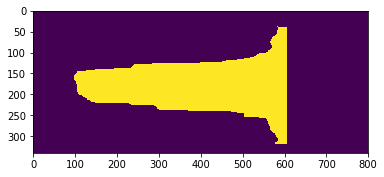

In [76]:
plt.imshow(X_test_cut[...,0][0])

In [83]:
XX_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["x"]

In [84]:
XX_test_cut = cut_X(XX_test)

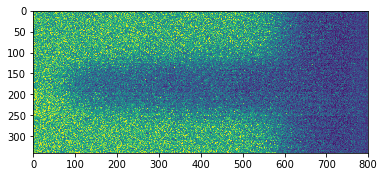

In [85]:
plt.imshow(XX_test_cut[...,0][0])

In [95]:
XX_train_RF = reshape_RF(XX_train_cut)

In [86]:
XX_test_RF = reshape_RF(XX_test_cut)

In [89]:
model = joblib.load("/storage/yw18581/data/trained_models/Leaf_position_regression/leaf_regression_RF_30est_8depth.pkl")

In [91]:
preds = model.predict(XX_test_RF)
mean_squared_error(y_test, preds)

345.90203240740743

In [92]:
model2 = RandomForestRegressor(max_depth=8, n_estimators=30, n_jobs=-1,
                                 criterion='mse')

In [96]:
model2.fit(XX_train_RF, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
model2.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [98]:
model.predict(XX_test_RF)

array([ 8.23333333, 22.26666667, 24.5       , 23.5       , 25.        ,
        8.96666667, 24.5       ,  5.66666667, 24.        , 24.23333333,
       24.5       , 25.        , 24.5       , 24.23333333, 24.5       ,
       24.        , 23.73333333, 23.53333333, 23.53333333, 24.5       ,
       24.5       , 22.76666667, 22.26666667, 25.        , 25.        ,
       24.5       , 22.46666667, 24.5       , 24.5       , 25.        ,
       23.5       , 22.7       , 22.2       , 21.16666667, 24.5       ,
       24.        , 24.5       , 25.        , 25.        , 22.96666667,
       10.56666667, 25.        ,  9.73333333, 24.3       ,  9.96666667,
       23.        , 24.5       , 23.8       , 24.5       , 25.        ,
       23.73333333,  8.63333333, 23.5       , 25.        , 10.26666667,
       23.8       ,  9.5       ,  8.93333333,  6.36666667, 25.        ,
       24.3       , 24.5       , 24.5       , 24.5       , 24.5       ,
        7.5       , 24.23333333, 24.5       , 24.5       , 23.73

In [99]:
preds = model.predict(XX_test_RF)
mean_squared_error(y_test, preds)

345.90203240740743